In [42]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
vocab_size = 2000
embedding_dim = 256
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [46]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "while", "with", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
# punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [47]:
category = []
questions = []

with open('train_1000.label', 'r') as f:
    for line in f:
        split_index = line.index(" ")
        category.append(line[:split_index])
        questions.append(line[(split_index+1):])

In [48]:
for i in range(0,len(questions)):
    question = questions[i].lower()
    for word in stopwords:
        token = " " + word + " "
        question = question.replace(token, " ")
#     question.replace("\n", "")
    question = question[:-3]
    questions[i] = question
print(len(category))
print(len(questions))
print(questions[0:10])

1000
1000
['how serfdom develop leave russia', 'what films featured character popeye doyle', "how can find list celebrities ' real names", 'what fowl grabs spotlight chinese year monkey', 'what full form .com', 'what contemptible scoundrel stole cork lunch', "what team baseball 's st. louis browns become", 'what oldest profession', 'what liver enzymes', 'name scar-faced bounty hunter old west']


In [49]:
train_size = int(len(questions) * training_portion)

train_questions = questions[:train_size]
train_category = category[:train_size]

validation_questions = questions[train_size:]
validation_category = category[train_size:]

print(train_size)
print(len(train_questions))
print(len(train_category))
print(len(validation_questions))
print(len(validation_category))

800
800
800
200
200


In [50]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_questions)
word_index = tokenizer.word_index
print(len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_questions)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

2285
5
30
6
30


In [51]:
validation_sequences = tokenizer.texts_to_sequences(validation_questions)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

200
(200, 30)


In [52]:
category_tokenizer = Tokenizer()
category_tokenizer.fit_on_texts(category)

training_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(train_category)), maxlen=1)
validation_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(validation_category)), maxlen=1)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(60, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 256)           512000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 60)                7740      
Total params: 552,636
Trainable params: 552,636
Non-trainable params: 0
_________________________________________________________________


In [54]:
num_epochs = 50
history = model.fit(train_padded, training_category_seq, epochs = num_epochs, validation_data=(validation_padded, validation_category_seq), verbose = 2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 - 2s - loss: 3.8979 - acc: 0.1562 - val_loss: 3.5656 - val_acc: 0.2100
Epoch 2/50
800/800 - 1s - loss: 3.2678 - acc: 0.1663 - val_loss: 3.1797 - val_acc: 0.2100
Epoch 3/50
800/800 - 1s - loss: 3.0789 - acc: 0.1525 - val_loss: 3.1173 - val_acc: 0.2100
Epoch 4/50
800/800 - 0s - loss: 3.0382 - acc: 0.1675 - val_loss: 3.0944 - val_acc: 0.2100
Epoch 5/50
800/800 - 1s - loss: 3.0008 - acc: 0.1663 - val_loss: 3.0771 - val_acc: 0.2100
Epoch 6/50
800/800 - 1s - loss: 2.9780 - acc: 0.1688 - val_loss: 3.0528 - val_acc: 0.2100
Epoch 7/50
800/800 - 1s - loss: 2.9256 - acc: 0.2375 - val_loss: 3.0046 - val_acc: 0.2100
Epoch 8/50
800/800 - 1s - loss: 2.8636 - acc: 0.1825 - val_loss: 2.9668 - val_acc: 0.2800
Epoch 9/50
800/800 - 1s - loss: 2.7854 - acc: 0.2763 - val_loss: 2.9066 - val_acc: 0.2200
Epoch 10/50
800/800 - 0s - loss: 2.6750 - acc: 0.3038 - val_loss: 2.8019 - val_acc: 0.3200
Epoch 11/50
800/800 - 0s - loss: 2.5338 - acc: 0.3562

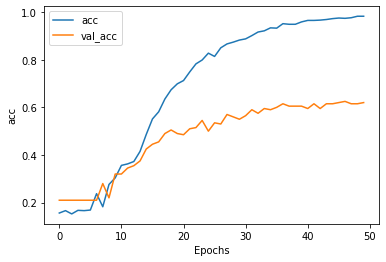

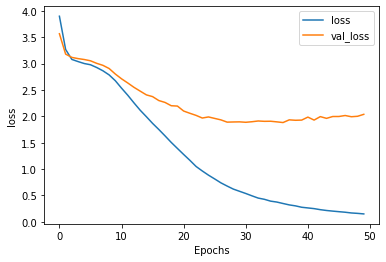

In [55]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")